In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR

In [2]:
table = pd.read_excel('fund.xlsx')

In [3]:
table

,family_structure,age1,age2,average(age),education1,education2,average_ed,postion1,postion2,location,house,premium,gross_income,rate
0,1,27,29,28.0,2,1.0,1.5,1,4.0,1,1,4.3000,22,0.195455
1,0,28,-1,28.0,1,NaN,1.0,4,NaN,0,0,0.8600,8,0.107500
2,1,29,29,29.0,2,2.0,2.0,4,2.0,0,1,0.6000,10,0.060000
3,1,31,29,30.0,0,0.0,0.0,6,6.0,0,1,1.2300,10,0.123000
4,1,29,29,29.0,0,0.0,0.0,6,6.0,0,1,3.5280,15,0.235200
5,0,35,-1,35.0,2,-1.0,2.0,2,-1.0,0,1,2.8000,6,0.466667
6,1,32,27,29.5,2,2.0,-1.0,6,2.0,1,1,1.5000,16,0.093750
7,0,-1,28,28.0,-1,1.0,1.0,-1,4.0,1,0,0.7600,8,0.095000
8,0,-1,27,27.0,-1,1.0,1.0,-1,2.0,1,0,0.8900,10,0.089000
9,1,34,28,31.0,1,1.0,1.0,6,8.0,1,0,0.5300,6,0.088333


In [93]:
X = table[['family_structure','location','rate']].as_matrix()
y = table[['premium']].as_matrix()

In [94]:
from sklearn import preprocessing

In [95]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
table_X = pd.DataFrame(X_scale,columns=['family_structure','location','gross_income'])
table_X['rate'] = min_max_scaler.fit_transform(y)
table_X

,family_structure,location,gross_income,rate
0,1.0,1.0,0.390078,0.156823
1,0.0,0.0,0.192279,0.016701
2,1.0,0.0,0.085457,0.006110
3,1.0,0.0,0.227136,0.031772
4,1.0,0.0,0.479460,0.125377
5,0.0,0.0,1.000000,0.095723
6,1.0,1.0,0.161357,0.042770
7,0.0,1.0,0.164168,0.012627
8,0.0,1.0,0.150675,0.017923
9,1.0,1.0,0.149175,0.003259


In [96]:
from sklearn.cross_validation import train_test_split 
X_train,X_test = train_test_split(X)
y_train,y_test = train_test_split(y)

In [97]:
svr = SVR(kernel='linear',epsilon=0.1)

In [98]:
svr.fit(X_scale,table_X['rate'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
y_predict = svr.predict(X_scale)

In [100]:
import matplotlib.pyplot as plt

In [101]:
x_axis = np.arange(0, 3, 0.1)
plt.plot(x_axis,table_X['rate'],'*',x_axis,y_predict,'-')

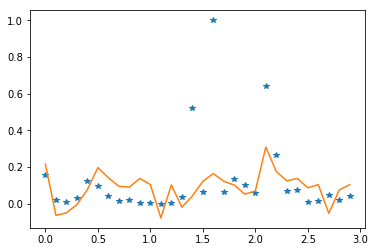

In [102]:
plt.show()

In [103]:
weights = svr.coef_
inter = svr.intercept_
weights

array([[ 0.04784432,  0.16764047,  0.32285723]])

In [104]:
#more data 
inter

array([-0.12680746])

In [105]:
import random

In [106]:
fm_s = np.random.randint(0,2,size=(300,1))
loc  = np.concatenate((np.zeros((150,1)),np.ones((150,1))),axis=0)
gross_income = np.concatenate((np.random.normal(loc=0.3,scale=0.5,size=(150,1)),np.random.normal(loc=0.7,scale=0.5,size=(150,1))))

In [107]:
#gross_income = min_max_scaler.fit_transform(abs(np.random.uniform(low= 0.01,high = 0.5,size=(300,1))))
gross_income = abs(np.random.uniform(low= 0.2,high = 0.6,size=(300,1)))
add_x_data = np.concatenate((fm_s,loc,gross_income),axis=1)
add_y = (np.dot(add_x_data,np.transpose(weights)) + inter) + abs(np.random.uniform(low=-0.1,high=0.1,size=(300,1)))

In [108]:
add_all_data = np.concatenate((add_x_data,add_y),axis=1)
temp = table_X.as_matrix()
add_all_data = np.concatenate((add_all_data,temp))

In [109]:
all_data_frame = pd.DataFrame(add_all_data,columns=['family_structure','location','gross_income','rate'])

In [110]:
all_data_frame

,family_structure,location,gross_income,rate
0,0.0,0.0,0.405782,0.032943
1,0.0,0.0,0.438559,0.105768
2,0.0,0.0,0.252612,0.000515
3,0.0,0.0,0.262516,-0.006585
4,1.0,0.0,0.579636,0.109319
5,1.0,0.0,0.251706,0.065093
6,1.0,0.0,0.506739,0.132668
7,1.0,0.0,0.597106,0.176213
8,1.0,0.0,0.387359,0.104504
9,0.0,0.0,0.470204,0.053031


In [111]:
add_x_data = all_data_frame[['family_structure','location','gross_income']]
add_y = all_data_frame['rate']
y_all_predict = svr.predict(add_x_data)

In [112]:
x_axis = np.arange(0,33,0.1)
plt.plot(x_axis,add_y,'*',x_axis,y_all_predict,'.')


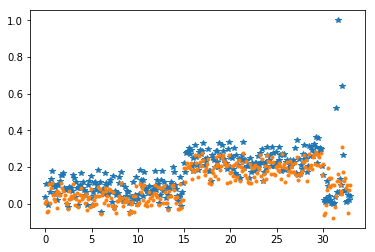

In [113]:
plt.show()

In [114]:
weights

array([[ 0.04784432,  0.16764047,  0.32285723]])

In [26]:
svr.score(add_x_data,add_y)

0.44854494823887892

In [44]:
svr_2 = SVR(kernel='linear',epsilon=0.01)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(add_x_data,add_y)
svr_2.fit(X_train,y_train)
svr_2.coef_

array([[ 0.0483915 ,  0.16193286,  0.33323691]])

In [90]:
svr_2.score(X_test,y_test)

-0.7530721085465828

In [122]:
x_axis = np.arange(0,8.3,0.1)
y_predict = svr_2.predict(X_test)
y_test.sort()
y_predict.sort()
plt.plot(x_axis,y_test,'*',label="Real_data")
plt.plot(x_axis,y_predict,'.',label='Predicted_data')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


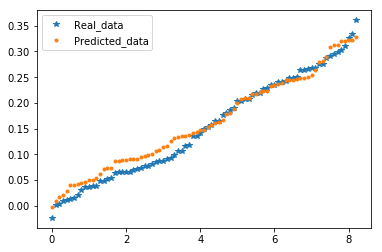

In [123]:
plt.legend()
plt.show()

In [75]:
X_train['rate']=y_train
X_test['rate']=y_test

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
X_train.to_csv('train.csv')
X_test.to_csv('test.csv')

In [80]:
X_test['rate']=y_test

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### 

In [86]:
X_test

,family_structure,location,gross_income,rate
212,0.0,1.0,0.567328,0.291317
112,1.0,0.0,0.459044,0.098306
205,1.0,1.0,0.406340,0.236972
228,1.0,1.0,0.257644,0.226217
283,0.0,1.0,0.481244,0.280068
217,0.0,1.0,0.537424,0.283948
66,0.0,0.0,0.394087,0.098785
141,1.0,0.0,0.399548,0.145735
56,1.0,0.0,0.546882,0.120743
274,1.0,1.0,0.440792,0.239339


In [82]:
X_train.to_csv('train.csv')
X_test.to_csv('test.csv')

In [92]:
y_test

array([[  2.  ],
       [ 25.  ],
       [  1.6 ],
       [ 16.2 ],
       [  1.8 ],
       [  0.95],
       [ 13.2 ],
       [  0.53]])